In [13]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex, solve, nonlinsolve
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy import tan as Tan
from sympy import cot as Cot
from sympy import S
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

## Парабола

**Атрибуты**: 

**парамет**р $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angl**e по умолчанию 0 для параболы с осью, параллельной OX, 
а для параболы с осью, параллельной  OY angle = $\pi/2$

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

**Методы**:

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой. 

В конструкторе экземпляра класса  

__new__(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [27]:
class Parabola(GeometrySet):

    def __new__(
        cls, p, vertex=None, angle=None, **kwargs):
        if vertex is None:
          vertex = Point(0, 0)
        if angle is None:
          angle = 0
        
        return GeometryEntity.__new__(cls, p, vertex, angle, **kwargs)
    
    @property
    def ambient_dimension(self):
        return 2
    
    @property
    def p(self):
        return self.args[0]

    @property
    def vertex(self):
        return self.args[1]
    
    @property
    def angle(self):
        return self.args[2]

    @property
    def axis_symmetry(self):
        if self.angle == Pi / 2:
          return Line(self.vertex, Point(self.vertex.x, self.vertex.y + 1))
        if self.angle == 3 * Pi / 2:
          return Line(self.vertex, Point(self.vertex.x, self.vertex.y - 1))
        return Line(self.vertex, self.focus)

    @property
    def directrix(self):
      if self.angle == Pi / 2:
          p1 =  Point(self.vertex.x, self.vertex.y - self.p / 2)
          p2 = Point(p1.x + 1, p1.y)
          return Line(p1, p2)
      if self.angle == 3 * Pi / 2:
          p1 =  Point(self.vertex.x, self.vertex.y + self.p / 2)
          p2 = Point(p1.x + 1, p1.y)
          return Line(p1, p2)
      from sympy.abc import x, y
      dx = symbols('x')
      dy = x * Tan(self.angle)
      end_x = solve(Eq(dx ** 2 + dy ** 2, (self.p / 2) ** 2), dx)[1]
      end_y = dy.subs({x: end_x})
      end_x = abs(end_x)
      end_y = abs(end_y)
      if (self.angle >= 3 * Pi / 2 and self.angle <= 2 * Pi) or (self.angle > 0 and self.angle < Pi / 2):
        end_x = - end_x
      if self.angle >= 0 and self.angle <= Pi:
        end_y = - end_y
      p1 = Point(self.vertex.x + end_x, self.vertex.y + end_y)

      end_x, end_y = end_y, end_x
      end_x = abs(end_x)
      end_y = abs(end_y)

      if (self.angle >= 0 and self.angle <= Pi / 2) or (self.angle >= Pi and self.angle <= 3 * Pi / 2):
        end_y = - end_y
      p2 = Point(p1.x + end_x, p1.y + end_y)
      return Line(p1, p2)
    @property
    def focus(self):
      if self.angle == Pi / 2:
        return Point(self.vertex.x, self.vertex.y + self.p / 2)
      from sympy.abc import x, y
      dx = symbols('x')
      dy = x * Tan(self.angle)
      end_x = solve(Eq(dx ** 2 + dy ** 2, (self.p / 2) ** 2), dx)[1]
      end_y = dy.subs({x: end_x})
      end_x = abs(end_x)
      end_y = abs(end_y)
      display('angle', self.angle)
      if self.angle >= Pi / 2 and self.angle <= 3 * Pi / 2:
        end_x = - end_x
      if self.angle >= Pi and self.angle <= 2 * Pi:
        end_y = - end_y
      return Point(self.vertex.x + end_x, self.vertex.y + end_y)
    

    def rotate(self, angle):
      p1 = self.p
      angle1 = self.angle + angle
      vertex1 = self.vertex
      return Parabola(p1, vertex=vertex1, angle=angle1)

    def ax_sym_equation(self):

      from sympy.abc import x, y
      if self.angle == Pi/2 or self.angle == 3 * Pi / 2:
        t = self.vertex.y - self.p / 2
        return Eq(  x, self.vertex.x      )



      
      p1 = self.axis_symmetry.p1
      p2 = self.axis_symmetry.p2
      if p1.x == p2.x:
        left = 0
      else:
        left = (x - p1.x) / (p2.x - p1.x)
      if p1.y == p2.y:
        right = 0
      else:
        right = (y - p1.y) / (p2.y - p1.y)
      
      return Eq(left, right)


    def dir_equation(self):
      from sympy.abc import x, y


      from sympy.abc import x, y
      if self.angle == Pi/2:
        #t = self.vertex.y - self.p / 2
        return Eq(  y, self.vertex.y - self.p / 2     )


      p1 = self.directrix.p1
      p2 = self.directrix.p2
      if p1.x == p2.x:
        left = 0
      else:
        left = (x - p1.x) / (p2.x - p1.x)
      if p1.y == p2.y:
        right = 0
      else:
        right = (y - p1.y) / (p2.y - p1.y)
      
      return Eq(left, right)
    
    def equation(self):
      from sympy.abc import x, y, alpha
      alpha, x0, y0, t = symbols('alpha x0 y0 t')
      sin_a = Sin(alpha)
      cos_a = Cos(alpha)
      A1 = Matrix([[cos_a, sin_a], 
            [-sin_a, cos_a]])
      X = A1 * Matrix((x - x0, y - y0))
      eq6 = Eq((X[1]) ** 2, 2 * t * (X[0]))

      eq6_subs= eq6.subs({x0: self.vertex[0], y0: self.vertex[1], t: self.p, alpha: self.angle})
      return eq6_subs

### Задание 2
Построить экземпляр класса Parabola - параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы. 

Изобрзить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная. 

p:


3

'vertex:'

Point2D(-5, 2)

'angle:'

pi/4

'focus:'

'angle'

pi/4

Point2D(-5 + 3*sqrt(2)/4, 3*sqrt(2)/4 + 2)

'axis_symmetry:'

'angle'

pi/4

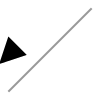

'dir'

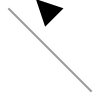

'eq:'

Eq((-sqrt(2)*(x + 5)/2 + sqrt(2)*(y - 2)/2)**2, 3*sqrt(2)*(x + 5) + 3*sqrt(2)*(y - 2))

'axis_eq:'

'angle'

pi/4

'angle'

pi/4

Eq(2*sqrt(2)*(x + 5)/3, 2*sqrt(2)*(y - 2)/3)

'dir_eq:'

Eq(2*sqrt(2)*(x + 3*sqrt(2)/4 + 5)/3, -2*sqrt(2)*(y - 2 + 3*sqrt(2)/4)/3)

In [29]:
myPar = Parabola(3, vertex=Point(-5, 2), angle=Pi/4)
print('p:')
display(myPar.p)
display('vertex:')
display(myPar.vertex)
display('angle:')
display(myPar.angle)
display('focus:')
display(myPar.focus)
display('axis_symmetry:')
display(myPar.axis_symmetry)
display('dir')
display(myPar.directrix)
display('eq:')
display(myPar.equation())
display('axis_eq:')
display(myPar.ax_sym_equation())
display('dir_eq:')
display(myPar.dir_equation())




'angle'

pi/4

'angle'

pi/4

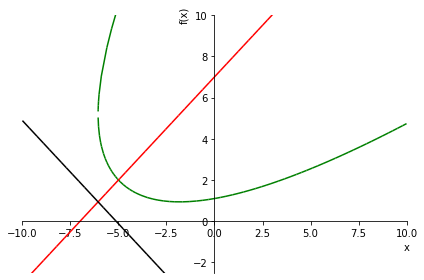

In [30]:
x, y = symbols('x y')
eq = myPar.equation()
s1 = solve(eq, y)[0]
s2 = solve(eq, y)[1]

#ax = plt.gca()

xl = (-10,10)
yl = (-2.5,10)

t1 = plot(s1,  xlim=xl, ylim=yl, axis_center=(0,0), autoscale=False, line_color='green', show=False)
t2 = plot(s2,  xlim=xl, ylim=yl,autoscale=False,line_color='green', show=False)
t1.append(t2[0])


eq = myPar.ax_sym_equation()
s1 = solve(eq, y)[0]
t2 = plot(s1,   xlim=xl, ylim=yl,autoscale=False,line_color='red', show=False)
t1.append(t2[0])


eq = myPar.dir_equation()
s1 = solve(eq, y)[0]
t2 = plot(s1,  xlim=xl, ylim=yl,autoscale=False,line_color='black', show=False)
t1.append(t2[0])





t1.show()

### Индивидуальное задание
Построить экземпляр класса Parabola - параболу $x^{2} = 2py$ с заданным $p$, построить другую параболу путем поворота исходной параболы  на угол $\alpha$ радиан. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол. 

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. Парабола фиолетовая, ось симметрии зеленая, директриса черная, название графика Парабола, подписи осей $x$ и $y$.

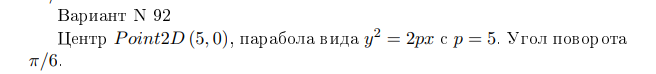

TURNED PARABOLA
p:


5

'vertex:'

Point2D(5, 0)

'angle:'

2*pi/3

'focus:'

'angle'

2*pi/3

Point2D(15/4, 5*sqrt(3)/4)

'axis_symmetry:'

'angle'

2*pi/3

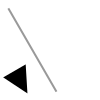

'dir'

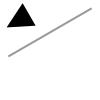

'eq:'

Eq((-y/2 - sqrt(3)*(x - 5)/2)**2, -5*x + 5*sqrt(3)*y + 25)

'axis_eq:'

'angle'

2*pi/3

'angle'

2*pi/3

Eq(4 - 4*x/5, 4*sqrt(3)*y/15)

'dir_eq:'

Eq(4*sqrt(3)*(x - 25/4)/15, 4*y/5 + sqrt(3))

 PARABOLA
p:


5

'vertex:'

Point2D(5, 0)

'angle:'

pi/2

'focus:'

Point2D(5, 5/2)

'axis_symmetry:'

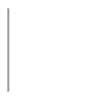

'dir'

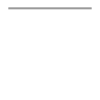

'eq:'

Eq((5 - x)**2, 10*y)

'axis_eq:'

Eq(x, 5)

'dir_eq:'

Eq(y, -5/2)

In [31]:
myPar2 = Parabola(5, vertex=Point(5,0), angle=Pi/2)
myPar2_turned = myPar2.rotate(Pi/6)



print('TURNED PARABOLA')
myPar = myPar2_turned
print('p:')
display(myPar.p)
display('vertex:')
display(myPar.vertex)
display('angle:')
display(myPar.angle)
display('focus:')
display(myPar.focus)
display('axis_symmetry:')
display(myPar.axis_symmetry)
display('dir')
display(myPar.directrix)
display('eq:')
display(myPar.equation())
display('axis_eq:')
display(myPar.ax_sym_equation())
display('dir_eq:')
display(myPar.dir_equation())

print('===============================================')
print(' PARABOLA')
myPar = myPar2
print('p:')
display(myPar.p)
display('vertex:')
display(myPar.vertex)
display('angle:')
display(myPar.angle)
display('focus:')
display(myPar.focus)
display('axis_symmetry:')
display(myPar.axis_symmetry)
display('dir')
display(myPar.directrix)
display('eq:')
display(myPar.equation())
display('axis_eq:')
display(myPar.ax_sym_equation())
display('dir_eq:')
display(myPar.dir_equation())

'angle'

2*pi/3

'angle'

2*pi/3

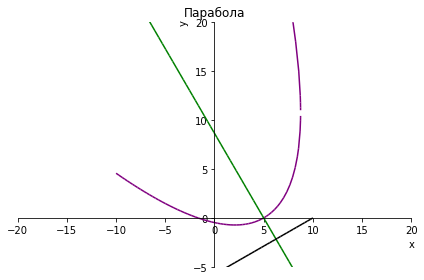

In [32]:
x, y = symbols('x y')
myPar = myPar2_turned
eq = myPar.equation()
s1 = solve(eq, y)[0]
s2 = solve(eq, y)[1]

#ax = plt.gca()

xl = (-20,20)
yl = (-5,20)

t1 = plot(s1, title='Парабола', ylabel='y' ,xlim=xl, ylim=yl, axis_center=(0,0), autoscale=False, line_color='purple', show=False)
t2 = plot(s2,  xlim=xl, ylim=yl,autoscale=False,line_color='purple', show=False)
t1.append(t2[0])


eq = myPar.ax_sym_equation()
s1 = solve(eq, y)[0]
t2 = plot(s1,   xlim=xl, ylim=yl,autoscale=False,line_color='green', show=False)
t1.append(t2[0])


eq = myPar.dir_equation()
s1 = solve(eq, y)[0]
t2 = plot(s1,  xlim=xl, ylim=yl,autoscale=False,line_color='black', show=False)
t1.append(t2[0])


t1.show()